In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, LSTM
import warnings
warnings.filterwarnings('ignore')
from collections import Counter


In [44]:
from google.colab import files
uploaded = files.upload()

Saving CPT_II_ConnersContinuousPerformanceTest.csv to CPT_II_ConnersContinuousPerformanceTest (2).csv


In [46]:
# Load the dataset
file_path = "CPT_II_ConnersContinuousPerformanceTest.csv"
df = pd.read_csv(file_path, delimiter=';')
df.head()

,ID,Assessment Status,Assessment Duration,Type,LastTrial,Trial1,Response1,Trial2,Response2,Trial3,...,Raw Score HitRTIsi,Percent HitRTIsi,General TScore HitSEIsi,Adhd TScore HitSEIsi,Neuro TScore HitSEIsi,Raw Score HitSEIsi,Percent HitSEIsi,Adhd Confidence Index,Neuro Confidence Index,Old Overall Index
0,2,3,839999,6,360,11,-1,13,469,7,...,0.049592,0,48.021103,47.772537,43.224297,-0.021096,0,61.145496,58.749630,10.070000
1,3,3,839999,6,360,12,-1,0,371,2,...,0.064090,0,42.234097,38.263283,41.574574,-0.077351,0,86.871597,61.088688,4.440000
2,4,3,839999,6,360,14,-1,10,-1,3,...,0.077233,0,45.680782,42.289310,43.868061,-0.046142,0,99.900002,86.131813,18.340000
3,5,3,839999,6,360,12,459,7,289,12,...,0.085540,0,85.698700,70.469986,80.228539,0.410634,0,99.900002,99.900002,8.950001
4,7,3,839998,6,360,11,841,7,-1,5,...,0.024632,0,42.058998,43.349667,39.992119,-0.071200,0,32.291084,24.225414,0.000000


In [47]:
df.isna().sum()


,0
ID,0
Assessment Status,0
Assessment Duration,0
Type,0
LastTrial,0
...,...
Raw Score HitSEIsi,0
Percent HitSEIsi,0
Adhd Confidence Index,0
Neuro Confidence Index,0


In [48]:
df.isna().sum().sum()


np.int64(0)

In [49]:
# Define target variable (ADHD Confidence Index as binary classification)
df['ADHD_Diagnosis'] = (df['Adhd Confidence Index'] > 50).astype(int)  # 1 = ADHD, 0 = No ADHD



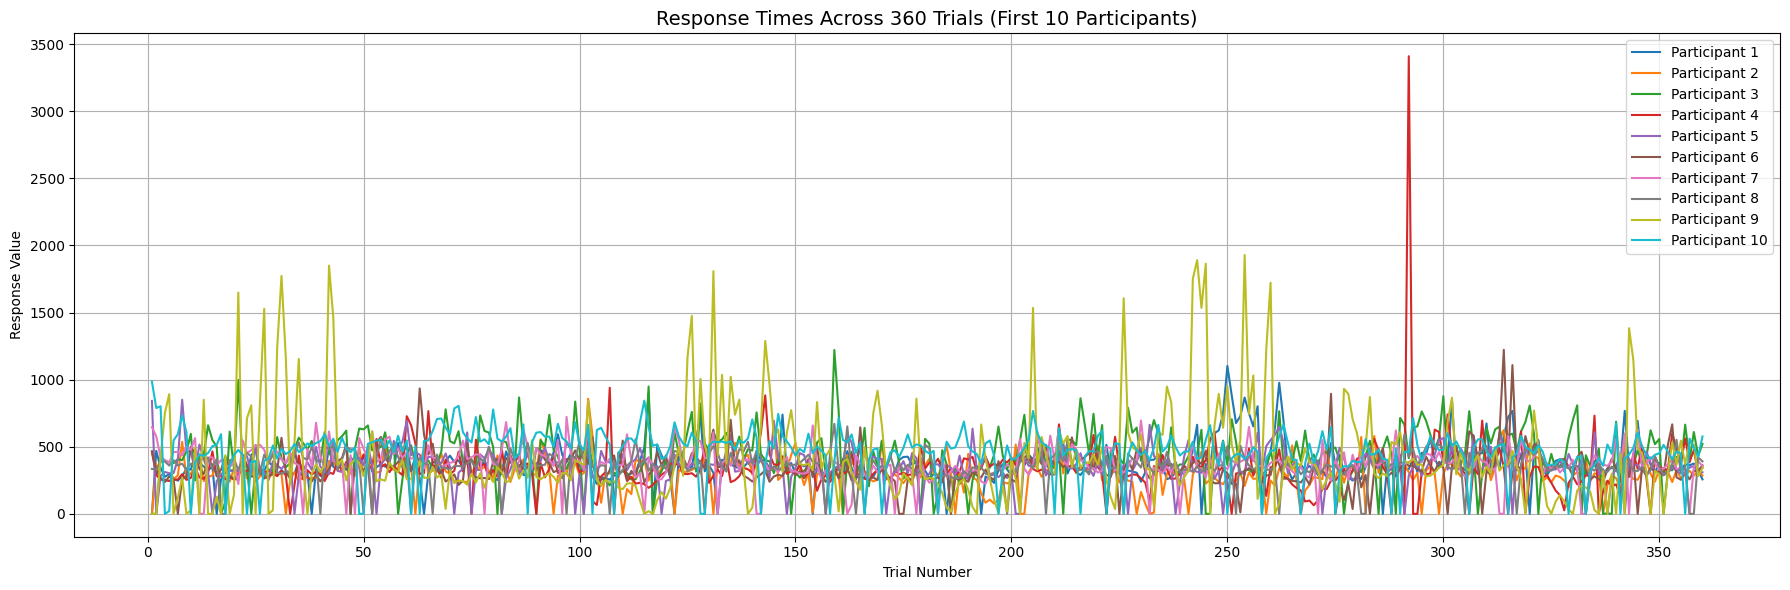

In [50]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Extract all Response columns (360 of them)
response_cols = [col for col in df.columns if 'Response' in col]

# Select a few participants (optional: to avoid overcrowding)
subset_df = df[response_cols].head(10)  # Plot for first 10 participants

# Plot the responses over trials
plt.figure(figsize=(18, 6))

for idx, row in subset_df.iterrows():
    plt.plot(range(1, len(response_cols) + 1), row.values, label=f'Participant {idx + 1}')

# Beautify the plot
plt.title('Response Times Across 360 Trials (First 10 Participants)', fontsize=14)
plt.xlabel('Trial Number')
plt.ylabel('Response Value')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

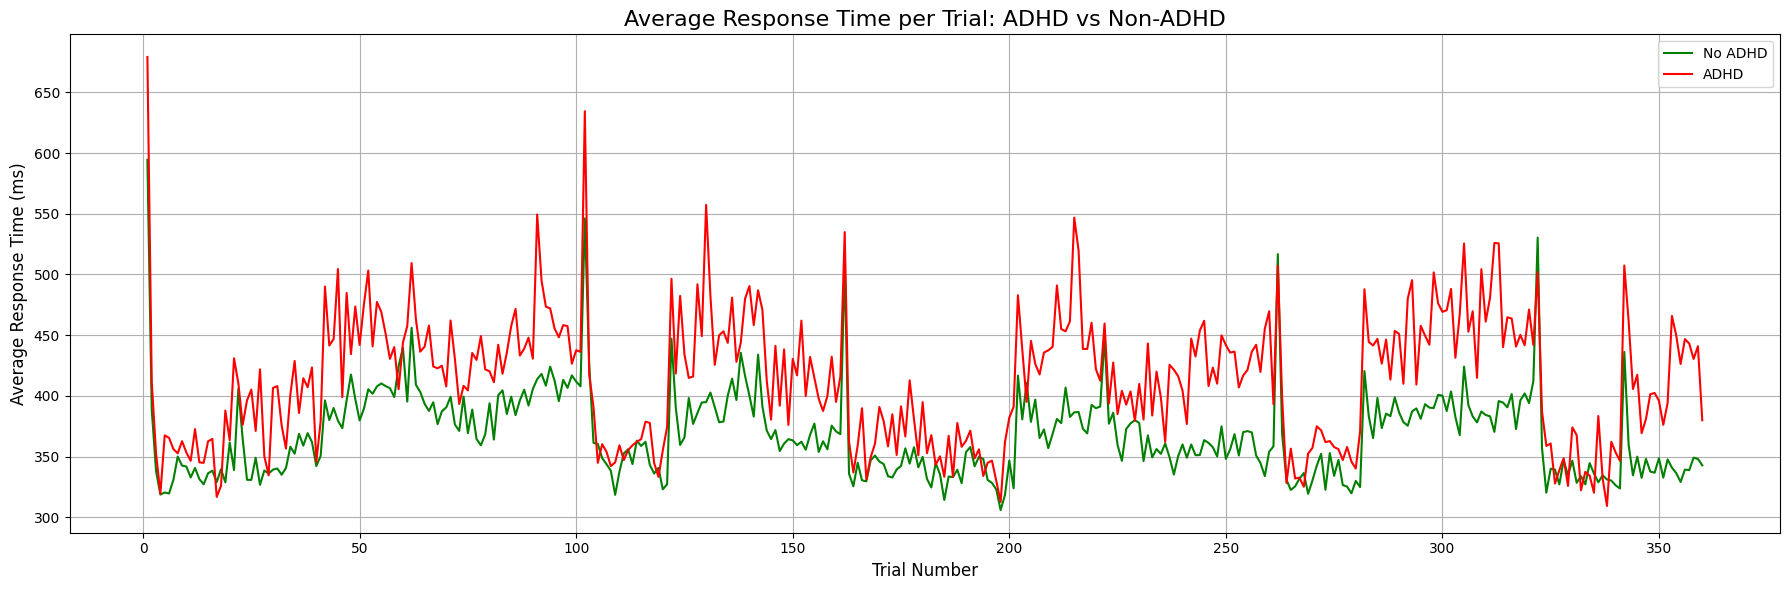

In [51]:
# Clean column names just in case there are extra spaces
df.columns = df.columns.str.strip()

# Create binary target column based on 'Adhd Confidence Index'
df['ADHD_Diagnosis'] = (df['Adhd Confidence Index'] > 50).astype(int)

# Get response columns
response_cols = [col for col in df.columns if 'Response' in col]

# Replace -1 with NaN for clean averaging
df[response_cols] = df[response_cols].replace(-1, np.nan)

# Calculate average response per trial for each group
adhd_group = df[df['ADHD_Diagnosis'] == 1][response_cols].mean()
non_adhd_group = df[df['ADHD_Diagnosis'] == 0][response_cols].mean()

# Plot
plt.figure(figsize=(18, 6))
plt.plot(range(1, 361), non_adhd_group.values, label='No ADHD', color='green')
plt.plot(range(1, 361), adhd_group.values, label='ADHD', color='red')

# Styling
plt.title('Average Response Time per Trial: ADHD vs Non-ADHD', fontsize=16)
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Average Response Time (ms)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


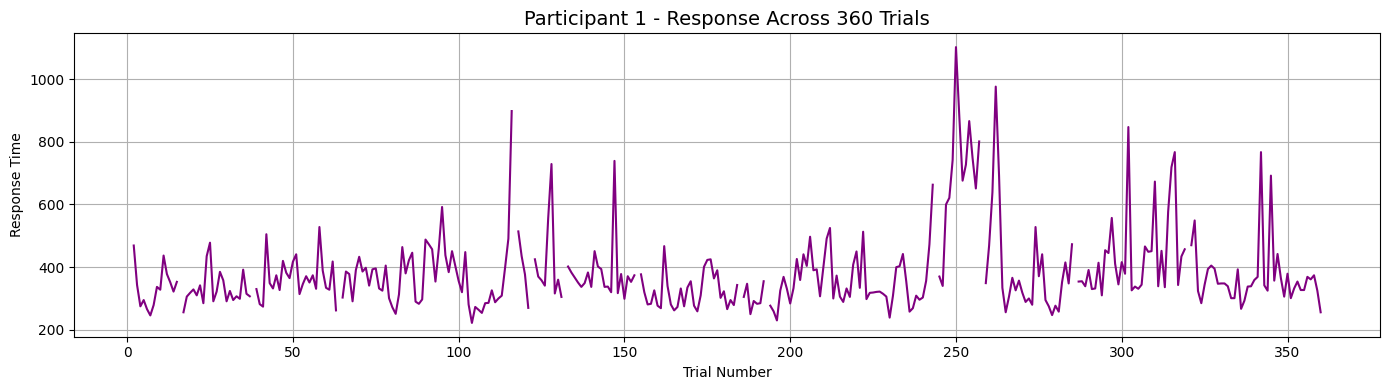

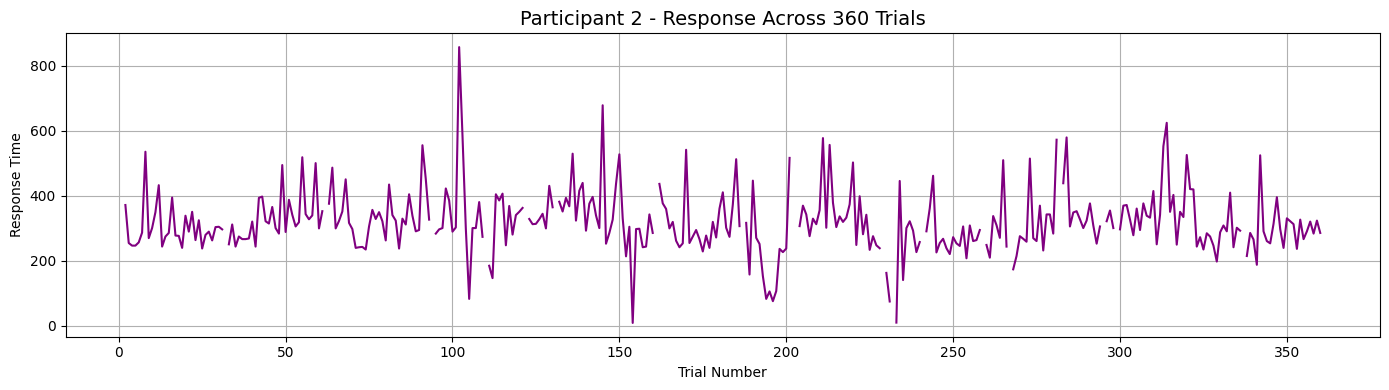

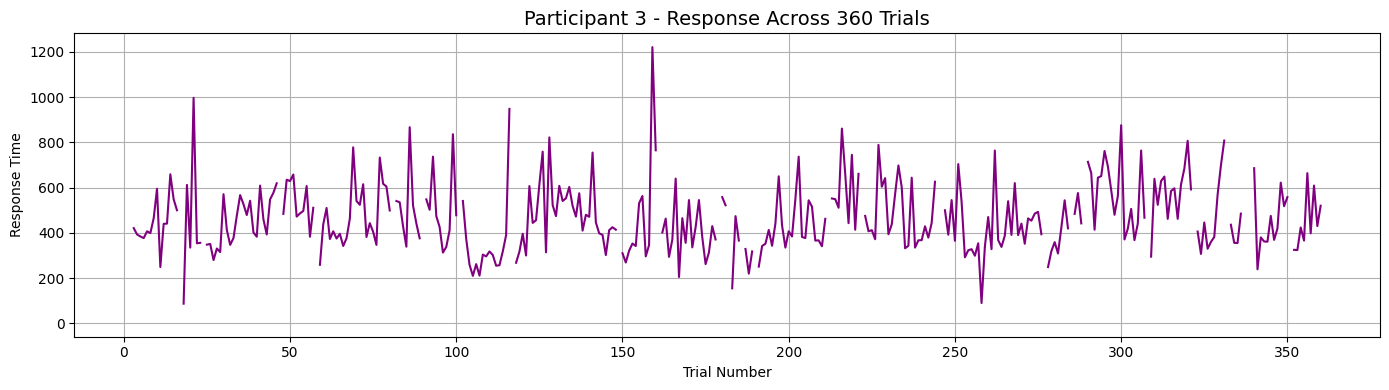

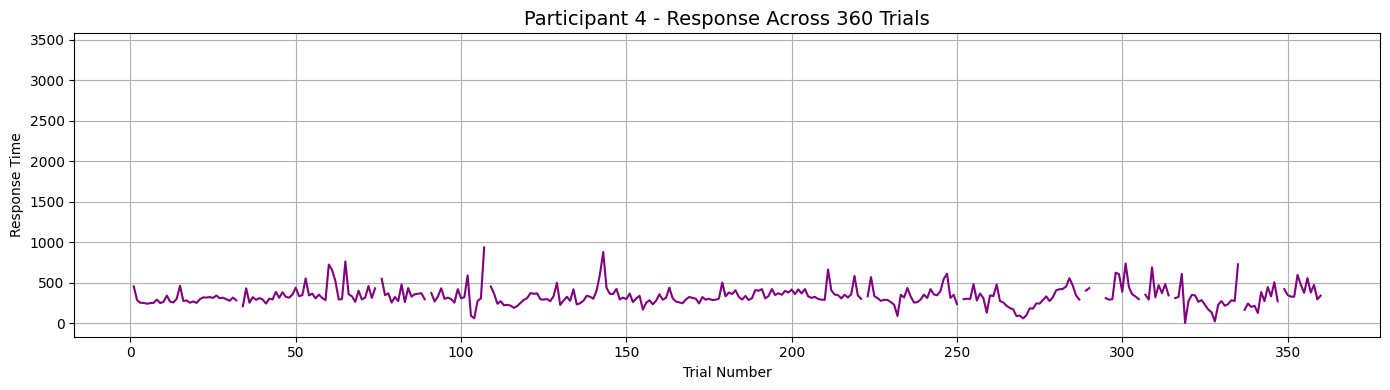

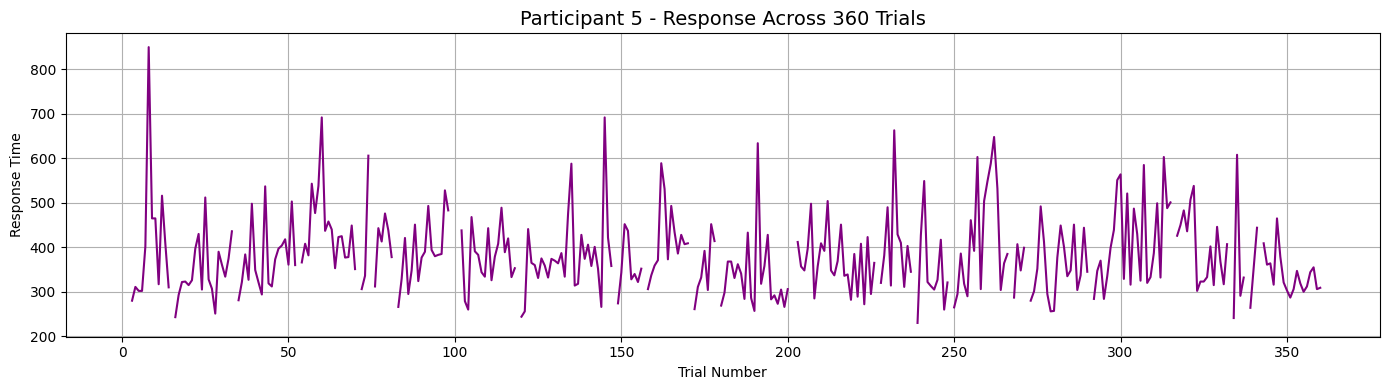

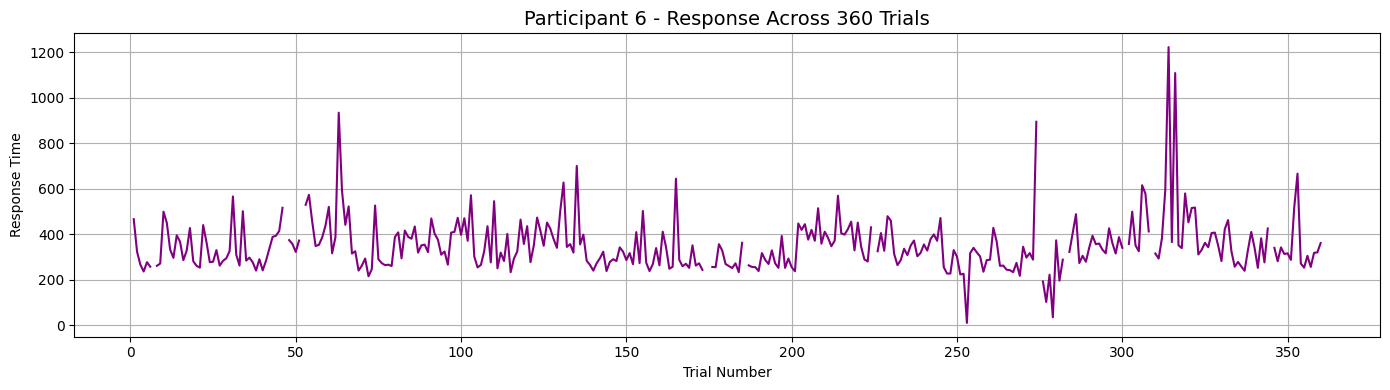

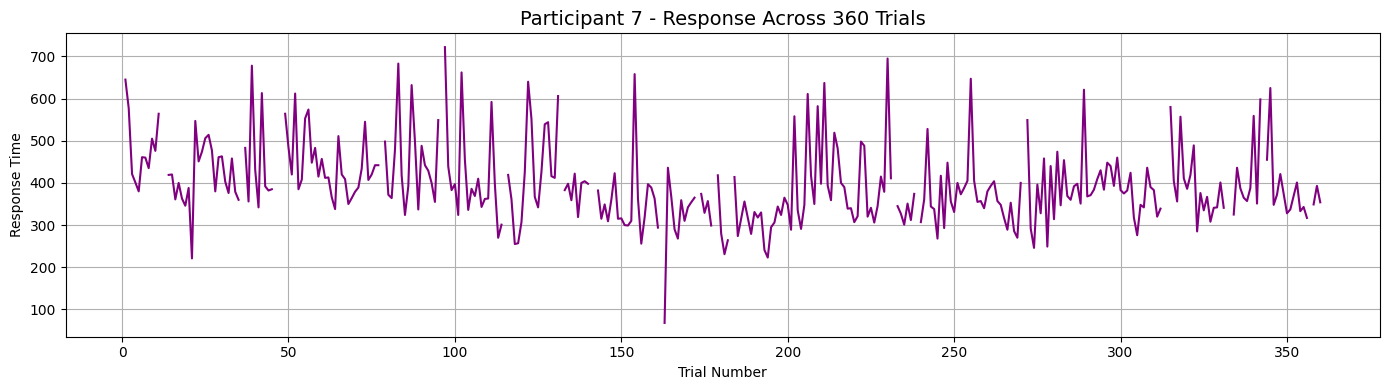

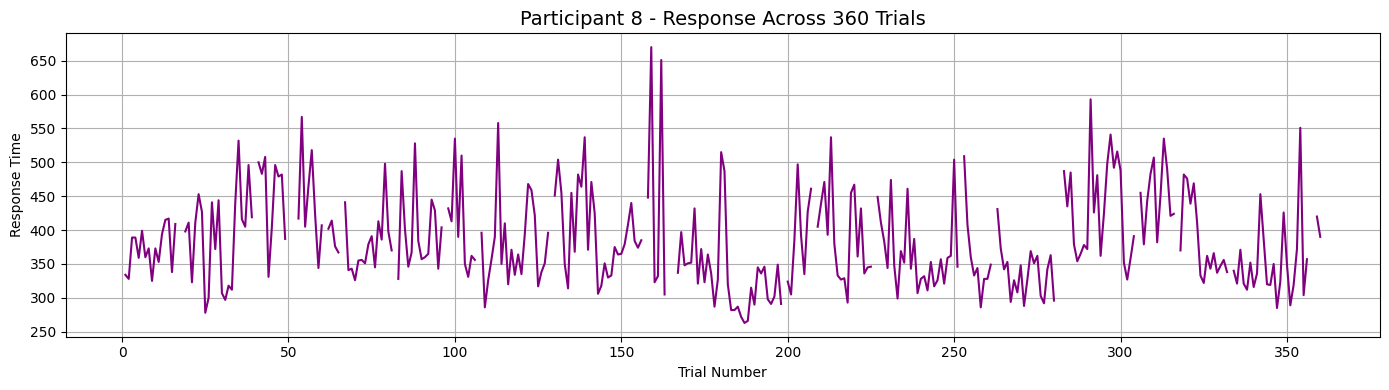

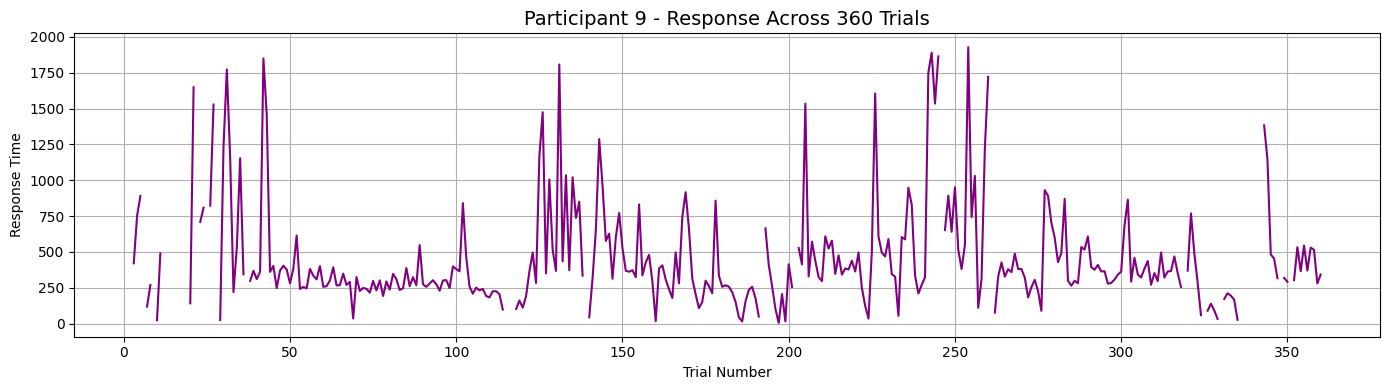

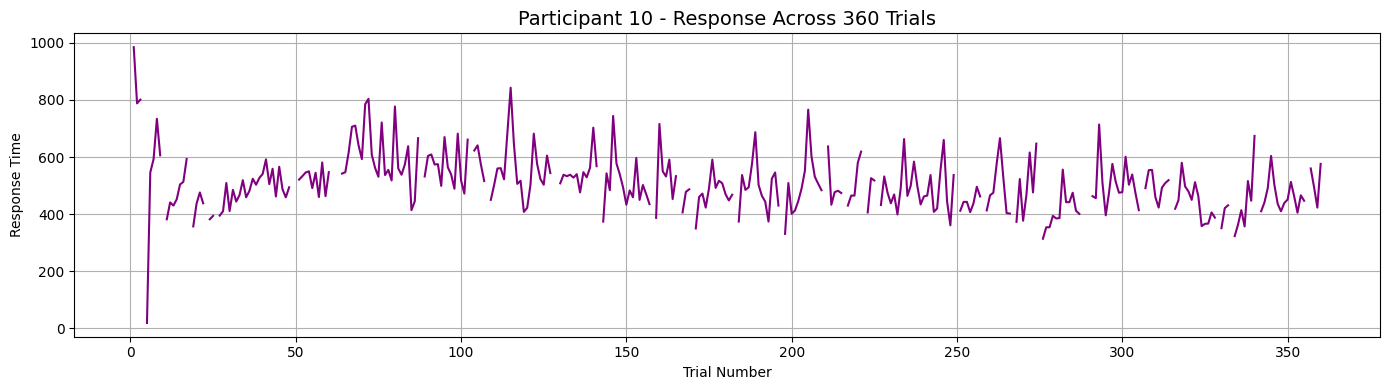

In [52]:
# Get all 360 response columns
response_cols = [col for col in df.columns if 'Response' in col]

# Loop over the first 10 participants
for i in range(10):
    plt.figure(figsize=(14, 4))
    plt.plot(range(1, 361), df.loc[i, response_cols].values, color='purple')
    plt.title(f'Participant {i+1} - Response Across 360 Trials', fontsize=14)
    plt.xlabel('Trial Number')
    plt.ylabel('Response Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
